# Combined Regression and Classification Models

https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/

## Load and sumamrize the abalone dataset

In [1]:
from pandas import read_csv
from matplotlib import pyplot

Load dataset

In [2]:
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv
dataframe = read_csv('abalone.csv', header=None)

Summarize shape

In [3]:
dataframe.shape

(4177, 9)

Summarize first few lines

In [4]:
dataframe.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Regression model

Split into input (X) and output (y) variables

In [5]:
dataset = dataframe.values

In [6]:
X, y = dataset[:, 1:-1], dataset[:,-1]

In [7]:
X, y = X.astype('float'), y.astype('float')

In [8]:
n_features = X.shape[1]

Encode strings to integer

In [9]:
from sklearn.preprocessing import LabelEncoder
from numpy import unique

In [10]:
y_class = LabelEncoder().fit_transform(y)

In [11]:
n_class = len(unique(y))

Split data into train and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test, y_train_class, y_test_class = train_test_split(X, y, y_class, test_size=0.33, random_state=1)

Define the Keras model

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

Input

In [15]:
visible = Input(shape=(n_features,))
hidden1 = Dense(20, activation='relu', kernel_initializer='he_normal')(visible)
hidden2 = Dense(10, activation='relu', kernel_initializer='he_normal')(hidden1)

Regression output

In [16]:
out_reg = Dense(1, activation='linear')(hidden2)

Classification output

In [17]:
out_clas = Dense(n_class, activation='softmax')(hidden2)

Define model

In [18]:
model = Model(inputs=visible, outputs=[out_reg, out_clas])

Compile the Keras model

In [19]:
model.compile(loss=['mse', 'sparse_categorical_crossentropy'], optimizer='adam')

Plot graph of model

In [20]:
from tensorflow.keras.utils import plot_model

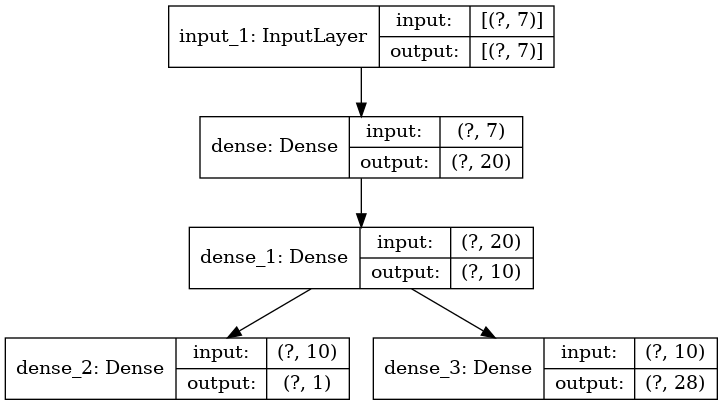

In [21]:
plot_model(model, show_shapes=True)

Fit the Keras model on the dataset

In [22]:
model.fit(X_train, [y_train, y_train_class], epochs=150, batch_size=32, verbose=2)

Epoch 1/150
88/88 - 0s - loss: 109.2932 - dense_2_loss: 106.0904 - dense_3_loss: 3.2029
Epoch 2/150
88/88 - 0s - loss: 74.2374 - dense_2_loss: 71.4086 - dense_3_loss: 2.8287
Epoch 3/150
88/88 - 0s - loss: 25.8948 - dense_2_loss: 23.2759 - dense_3_loss: 2.6189
Epoch 4/150
88/88 - 0s - loss: 9.6772 - dense_2_loss: 7.1266 - dense_3_loss: 2.5505
Epoch 5/150
88/88 - 0s - loss: 9.3954 - dense_2_loss: 6.8869 - dense_3_loss: 2.5084
Epoch 6/150
88/88 - 0s - loss: 9.2854 - dense_2_loss: 6.7918 - dense_3_loss: 2.4936
Epoch 7/150
88/88 - 0s - loss: 9.1876 - dense_2_loss: 6.7029 - dense_3_loss: 2.4848
Epoch 8/150
88/88 - 0s - loss: 9.0785 - dense_2_loss: 6.6046 - dense_3_loss: 2.4740
Epoch 9/150
88/88 - 0s - loss: 8.9795 - dense_2_loss: 6.5116 - dense_3_loss: 2.4679
Epoch 10/150
88/88 - 0s - loss: 8.8605 - dense_2_loss: 6.4014 - dense_3_loss: 2.4591
Epoch 11/150
88/88 - 0s - loss: 8.7464 - dense_2_loss: 6.2945 - dense_3_loss: 2.4519
Epoch 12/150
88/88 - 0s - loss: 8.6398 - dense_2_loss: 6.1964 - de

Epoch 98/150
88/88 - 0s - loss: 6.8291 - dense_2_loss: 4.8181 - dense_3_loss: 2.0110
Epoch 99/150
88/88 - 0s - loss: 6.8641 - dense_2_loss: 4.8518 - dense_3_loss: 2.0123
Epoch 100/150
88/88 - 0s - loss: 6.8229 - dense_2_loss: 4.8147 - dense_3_loss: 2.0082
Epoch 101/150
88/88 - 0s - loss: 6.8203 - dense_2_loss: 4.8138 - dense_3_loss: 2.0065
Epoch 102/150
88/88 - 0s - loss: 6.8325 - dense_2_loss: 4.8253 - dense_3_loss: 2.0071
Epoch 103/150
88/88 - 0s - loss: 6.8899 - dense_2_loss: 4.8823 - dense_3_loss: 2.0076
Epoch 104/150
88/88 - 0s - loss: 6.8346 - dense_2_loss: 4.8290 - dense_3_loss: 2.0056
Epoch 105/150
88/88 - 0s - loss: 6.8082 - dense_2_loss: 4.8066 - dense_3_loss: 2.0016
Epoch 106/150
88/88 - 0s - loss: 6.8256 - dense_2_loss: 4.8230 - dense_3_loss: 2.0025
Epoch 107/150
88/88 - 0s - loss: 6.8023 - dense_2_loss: 4.8026 - dense_3_loss: 1.9997
Epoch 108/150
88/88 - 0s - loss: 6.7908 - dense_2_loss: 4.7931 - dense_3_loss: 1.9977
Epoch 109/150
88/88 - 0s - loss: 6.7881 - dense_2_loss: 

Make predictions on the test set

In [23]:
yhat1, yhat2 = model.predict(X_test)

Calculate error of the regression model

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
error = mean_absolute_error(y_test, yhat1)

In [26]:
print(f'MAE: {error:.3f}')

MAE: 1.551


Evaluate accuracy for classification error

In [27]:
from sklearn.metrics import accuracy_score
from numpy import argmax

In [28]:
yhat2 = argmax(yhat2, axis=-1).astype('int')

In [29]:
acc = accuracy_score(y_test, yhat2)

In [30]:
print(f'Accuracy: {acc:.3f}')

Accuracy: 0.178
